In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.model_selection import ParameterGrid
import pickle
import sys

In [5]:
def merck_euler(population,dt,b,b1,q,m,n1,n2,n3,a):
    
    x, y1,y2,y3 = population
    
    dy      = np.empty(4)
    
    M = m+n1+n2+n3
    
    dy[0] = x + dt*(x*(b*q**(M)-a))
    dy[1] = y1 + dt*(x*b*q**(M-n1)*(1-q**n1) + y1*(b*q**(M-n1)-a))
    dy[2] = y2 + dt*(x*b*q**(M-n2)*(1-q**n2) + y2*(b1*q**(M-n2)-a))
    dy[3] = y3 + dt*(x*b*(q**m)*(1-q**n3)+y1*b*(q**m)*(1-q**(n2+n3))+y2*b1*(q**m)*(1-q**(n1+n3)) + y3*(b1*(q**m)-a))
    
    return(dy)

In [6]:
def simulation(init,b,b1,a,ap,q,qd,m,n1,n2,n3,tim,ttr):
    
    dt = 1e-4
    initial = [init[0],init[1], init[2], init[3]]
    population = initial.copy()
    pop_evol = []
    
    current_q = q
    current_a = a

    for ngen in np.arange(150/dt):
        if ngen % 10 == 0:
            pop_evol.append(population)
        
        population = merck_euler(population,dt,b,b1,current_q,m,n1,n2,n3,current_a)
        
        # immune system kicks in
        if ngen > tim/dt:
            current_a = ap
            
        # Merck treatment starts
        if ngen > ttr/dt:
            current_q = qd
            
    pop_evol = np.array(pop_evol)
    return(pop_evol)

In [51]:
init = [1,0,0,0]
b = 7.61
b1 = b*0.9
a = 3
ap = 8.8
q = 1-1e-6
qd = 1-3e-6
m = 20000
n1 = 87
n2 = 6713
n3 = 100
tim = 5
ttr = 2

In [52]:
test = simulation(init,b,b1,a,ap,q,qd,m,n1,n2,n3,tim,ttr)

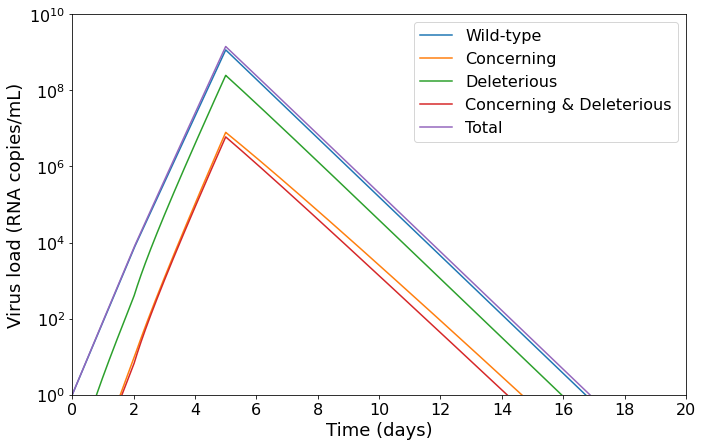

In [54]:
fig, ax = plt.subplots(figsize = (11,7))

ax.plot(np.arange(0,150,1e-3), test)
ax.plot(np.arange(0,150,1e-3), np.sum(test, axis = 1))
ax.set_yscale('log')
ax.set_ylim(1e0,1e10)
ax.set_xlim(0,20)
ax.set_xticks(np.arange(0,21,2))
ax.legend(['Wild-type', 'Concerning', 'Deleterious', 'Concerning & Deleterious', 'Total'], fontsize = 16)
ax.set_xlabel('Time (days)', fontsize = 18)
ax.set_ylabel('Virus load (RNA copies/mL)', fontsize = 18)
ax.tick_params(labelsize = 16)
plt.savefig('virusload_dynamics_5FEB.jpg', dpi = 600, bbox_inches = 'tight')

In [48]:
test_control = simulation(init,b,b1,a,ap,q,q,m,n1,n2,n3,tim,ttr)
test_treat = simulation(init,b,b1,a,ap,q,qd,m,n1,n2,n3,tim,ttr)

In [49]:
ERF = (np.sum(test_treat[:,3]) + np.sum(test_treat[:,1]))/(np.sum(test_control[:,3]) + np.sum(test_control[:,1]))

In [50]:
ERF

0.5192364642334096

In [53]:
4.5*6

27.0

In [91]:
0.3*29900

8970.0